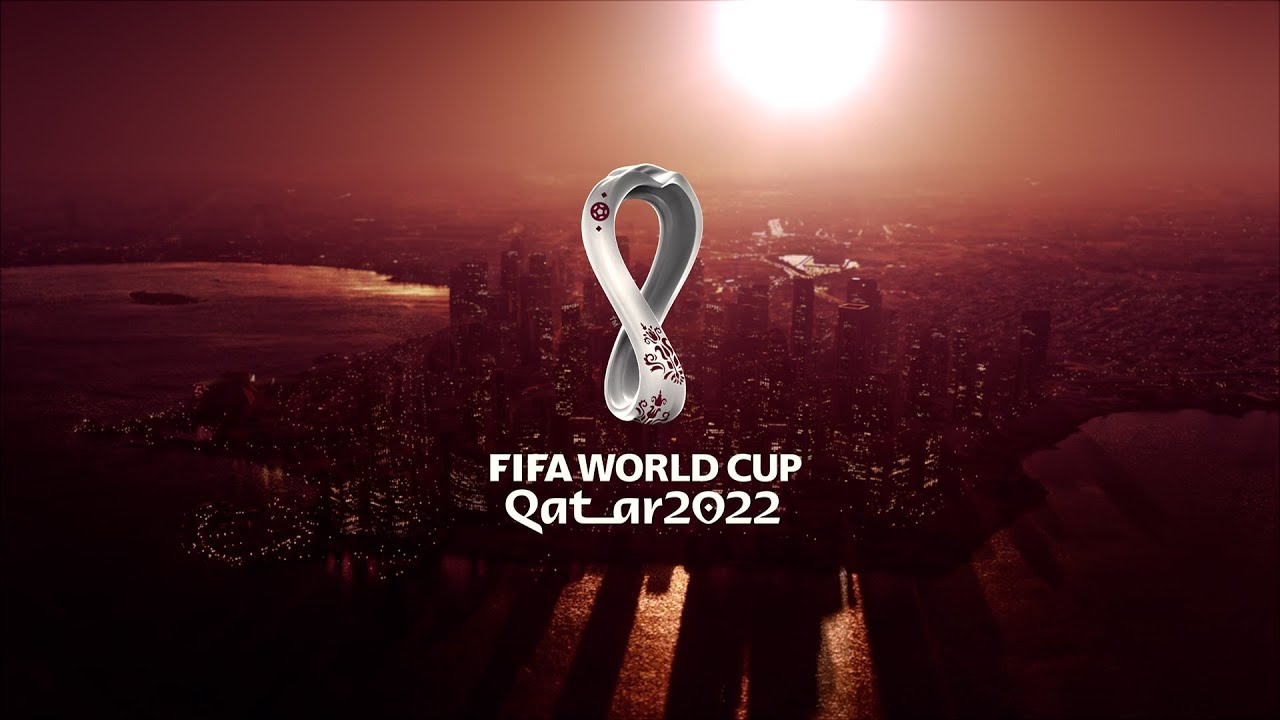

This is the data of 63 matches in this World Cup. Firstly, we pre-processed and cleaned our data. In order to compare the performance of the two teams in the final match and the whole tournament, we first extracted the data of the final separately, as shown in the figure below. Secondly, we integrated all the data, extracted part of the data we needed and calculated separately, and we will talk this part later.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [2]:
df=pd.read_csv('Fifa_world_cup_matches.csv')
df.head(10)

team1         team2 possession team1 possession team2  \
0          QATAR       ECUADOR              42%              50%   
1        ENGLAND          IRAN              72%              19%   
2        SENEGAL   NETHERLANDS              44%              45%   
3  UNITED STATES         WALES              51%              39%   
4      ARGENTINA  SAUDI ARABIA              64%              24%   
5        DENMARK       TUNISIA              55%              33%   
6         MEXICO        POLAND              54%              31%   
7         FRANCE     AUSTRALIA              56%              35%   
8        MOROCCO       CROATIA              32%              57%   
9        GERMANY         JAPAN              65%              22%   

  possession in contest  number of goals team1  number of goals team2  \
0                    8%                      0                      2   
1                    9%                      6                      2   
2                   11%                      0                      2   
3                   10%                      1                      1   
4                   12%                      1                      2   
5                   12%                      0                      0   
6                   15%                      0                      0   
7                    9%                      4                      1   
8                   12%                      0                      0   
9                   13%                      1                      2   

          date     hour category  ...  penalties scored team1  \
0  20 NOV 2022  17 : 00  Group A  ...                       0   
1  21 NOV 2022  14 : 00  Group B  ...                       0   
2  21 NOV 2022  17 : 00  Group A  ...                       0   
3  21 NOV 2022  20 : 00  Group B  ...                       0   
4  22 NOV 2022  11 : 00  Group C  ...                       1   
5  22 NOV 2022  14 : 00  Group D  ...                       0   
6  22 NOV 2022  17 : 00  Group C  ...                       0   
7  22 NOV 2022  20 : 00  Group D  ...                       0   
8  23 NOV 2022  11 : 00  Group F  ...                       0   
9  23 NOV 2022  14 : 00  Group E  ...                       1   

   penalties scored team2  goal preventions team1  goal preventions team2  \
0                       1                       6                       5   
1                       1                       8                      13   
2                       0                       9                      15   
3                       1                       7                       7   
4                       0                       4                      14   
5                       0                      11                      11   
6                       0                       8                      15   
7                       0                       4                      22   
8                       0                       7                       8   
9                       0                      12                      26   

   own goals team1  own goals team2  forced turnovers team1  \
0                0                0                      52   
1                0                0                      63   
2                0                0                      63   
3                0                0                      81   
4                0                0                      65   
5                0                0                      76   
6                0                0                      61   
7                0                0                      64   
8                0                0                      87   
9                0                0                      55   

   forced turnovers team2  defensive pressures applied team1  \
0                      72                                256   
1                      72                                139   
2       

In [3]:
df.columns = df.columns.str.replace(" ", "_")
df.columns

Index(['team1', 'team2', 'possession_team1', 'possession_team2',
       'possession_in_contest', 'number_of_goals_team1',
       'number_of_goals_team2', 'date', 'hour', 'category',
       'total_attempts_team1', 'total_attempts_team2', 'conceded_team1',
       'conceded_team2', 'goal_inside_the_penalty_area_team1',
       'goal_inside_the_penalty_area_team2',
       'goal_outside_the_penalty_area_team1',
       'goal_outside_the_penalty_area_team2', 'assists_team1', 'assists_team2',
       'on_target_attempts_team1', 'on_target_attempts_team2',
       'off_target_attempts_team1', 'off_target_attempts_team2',
       'attempts_inside_the_penalty_area_team1',
       'attempts_inside_the_penalty_area__team2',
       'attempts_outside_the_penalty_area__team1',
       'attempts_outside_the_penalty_area__team2', 'left_channel_team1',
       'left_channel_team2', 'left_inside_channel_team1',
       'left_inside_channel_team2', 'central_channel_team1',
       'central_channel_team2', 'right_in

In [4]:
df.possession_team1 = df.possession_team1.apply(lambda x: x.replace("%",''))
df.possession_team2 = df.possession_team2.apply(lambda x: x.replace("%",''))
df.possession_in_contest = df.possession_in_contest.apply(lambda x: x.replace("%",''))

In [5]:
df.possession_team1 = pd.to_numeric(df.possession_team1)
df.possession_team2 = pd.to_numeric(df.possession_team2)
df.possession_in_contest = pd.to_numeric(df.possession_in_contest)

Now let's focus on the final match, which was played between Argentina and France, and the final score after regulation time was a 3-3 tie. Eventually, Argentina won the championship through a penalty shootout. Through an analysis of the ball possession rate in this game, we can see that there was not a significant difference between the two teams, Argentina had 46% and France had 40%, Argentina led slightly. Also, in this World Cup, a new concept was introduced - possession in contest, which represents the time when neither team effectively controlled the ball during ball contests and physical contact. 14%, it was the fifth-highest value in this World Cup. Combined with the final score of 3-3, it means that the two teams were evenly matched on the field, and the physical confrontations were intense.


In [6]:
final = df.loc[df['category']== 'Final']
final

team1   team2  possession_team1  possession_team2  \
63  ARGENTINA  FRANCE                46                40   

    possession_in_contest  number_of_goals_team1  number_of_goals_team2  \
63                     14                      3                      3   

           date     hour category  ...  penalties_scored_team1  \
63  18 DEC 2022  16 : 00    Final  ...                       1   

    penalties_scored_team2  goal_preventions_team1  goal_preventions_team2  \
63                       2                      11                      21   

    own_goals_team1  own_goals_team2  forced_turnovers_team1  \
63                0                0                      87   

    forced_turnovers_team2  defensive_pressures_applied_team1  \
63                     104                                280   

    defensive_pressures_applied_team2  
63                                409  

[1 rows x 88 columns]

In [7]:
random_x = [46, 40, 14]
names = ['possession_Argentina', 'possession_France', 'possession_in_contest']
 
fig = px.pie(values=random_x, names=names)
fig.update_traces(pull = [0,0,0.15])
fig.show()

Before we delve into further analysis, let me introduce the vertical channels on a football field. The entire field is divided into 5 vertical channels, from the left to the right, there are the left channel, the left inside channel, the central channel, the right inside channel, and the right channel. By analyzing the number of times a team uses each channel during their attacks, we can determine the team's preferences in their attacking choices.

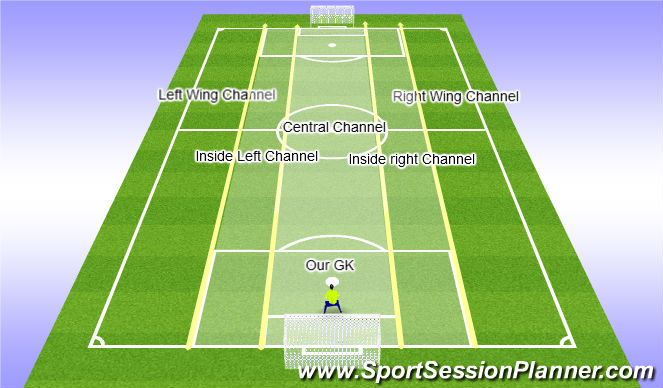

In this match, Argentina launched most of the attacks through the left channel, while the usage of the other four channels was relatively even. France mainly attacked through the two wings, the left channel and the right channel, with less emphasis on the central channel.

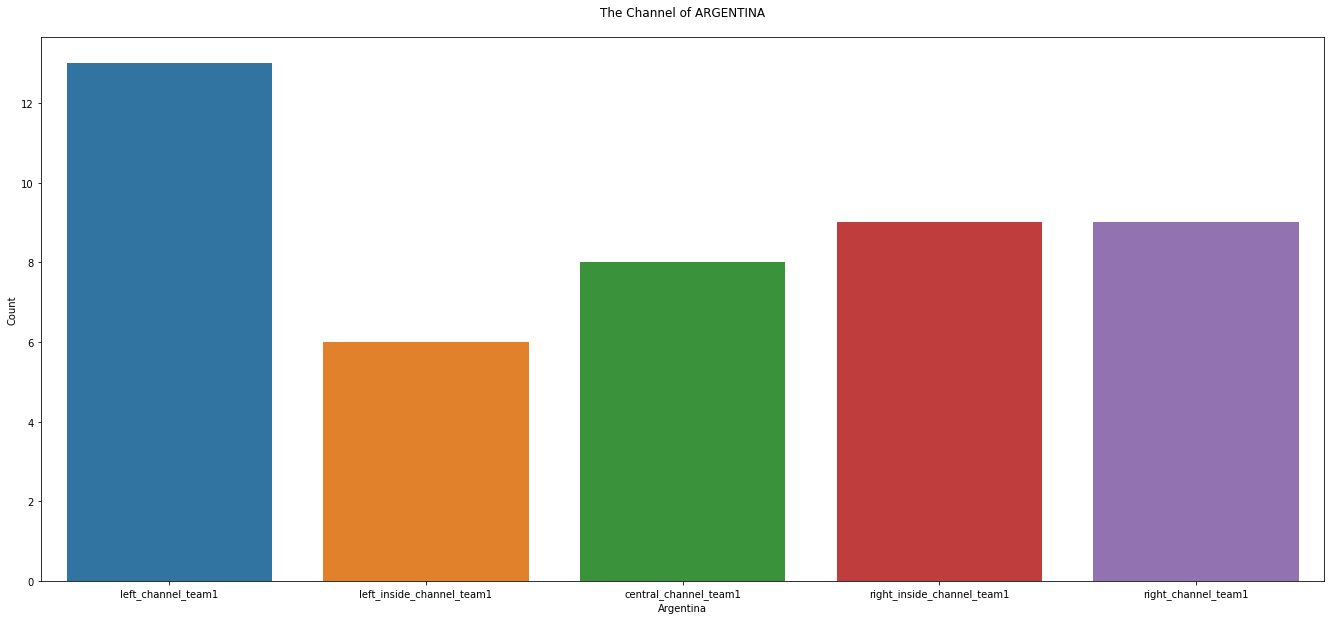

In [8]:
# Set the figure size
plt.figure(figsize=(23, 10))

# Create the bar plot using Seaborn
sns.barplot(data=final[['left_channel_team1', 'left_inside_channel_team1', 'central_channel_team1', 'right_inside_channel_team1', 'right_channel_team1']])

# Set the x-axis label
plt.xlabel("Argentina")

# Set the y-axis label
plt.ylabel("Count")

# Set the plot title
plt.title('The Channel of ARGENTINA\n')

# Display the plot
plt.show()

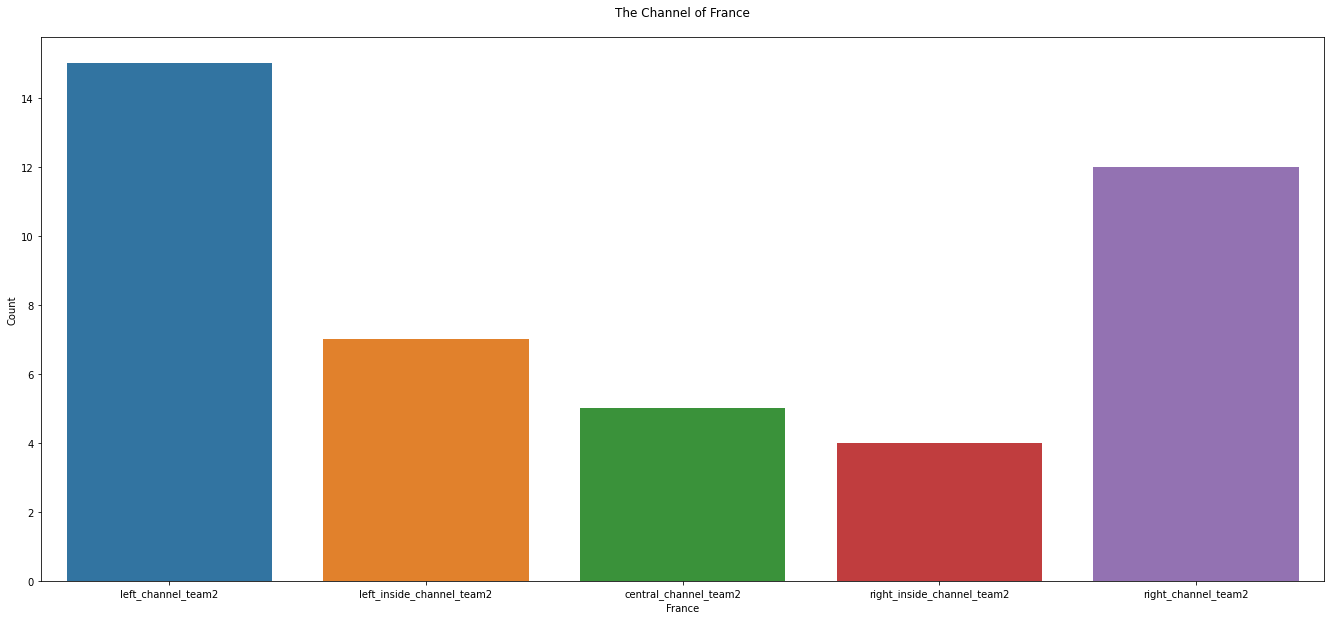

In [9]:
# Set the figure size
plt.figure(figsize=(23, 10))

# Create the bar plot using Seaborn
sns.barplot(data=final[['left_channel_team2', 'left_inside_channel_team2', 'central_channel_team2', 'right_inside_channel_team2', 'right_channel_team2']])

# Set the x-axis label
plt.xlabel("France")

# Set the y-axis label
plt.ylabel("Count")

# Set the plot title
plt.title('The Channel of France\n')

# Display the plot
plt.show()

We would like to know whether the attacking choices of both teams in this match are consistent with their overall choices in this World Cup, or whether they have targeted them specifically for this match. In order to obtain the complete data of each team in this World Cup, we have conducted some data mining and integration, as we mentioned at the beginning. 

In [11]:
team1_goals = df.groupby('team1') \
    .agg({"number_of_goals_team1":"sum",
          'total_attempts_team1' : "sum",
          'conceded_team1' : "sum",
          'goal_inside_the_penalty_area_team1' : "sum",
          'goal_outside_the_penalty_area_team1' : "sum",
          'assists_team1' : "sum",
          'on_target_attempts_team1' : "sum",
          'off_target_attempts_team1' : "sum",
          'attempts_inside_the_penalty_area_team1' : "sum",
          'attempts_outside_the_penalty_area__team1' : "sum",
          'left_channel_team1' : "mean", 
          'left_inside_channel_team1' : "mean", 
          'central_channel_team1' : "mean",
          'right_inside_channel_team1' : "mean",
          'right_channel_team1' : "mean",
          'inbehind_offers_to_receive_team1': "sum",
          'infront_offers_to_receive_team1' : "sum",
          'yellow_cards_team1' : "sum",
          'red_cards_team1' : "sum",
          'passes_team1' : "sum",
          'passes_completed_team1' : "sum",
          'crosses_team1' : "sum",
          'defensive_pressures_applied_team1' : "mean"
          }) \
    .reset_index()
#team1_goals.head()

In [12]:
team2_goals = df.groupby('team2') \
    .agg({"number_of_goals_team2":"sum",
          'total_attempts_team2' : "sum",
          'conceded_team2' : "sum",
          'goal_inside_the_penalty_area_team2' : "sum",
          'goal_outside_the_penalty_area_team2' : "sum",
          'assists_team2' : "sum",
          'on_target_attempts_team2' : "sum",
          'off_target_attempts_team2' : "sum",
          'attempts_inside_the_penalty_area__team2' : "sum",
          'attempts_outside_the_penalty_area__team2' : "sum",
          'left_channel_team2' : "mean", 
          'left_inside_channel_team2' : "mean", 
          'central_channel_team2' : "mean",
          'right_inside_channel_team2' : "mean",
          'right_channel_team2' : "mean",
          'inbehind_offers_to_receive_team2': "sum",
          'infront_offers_to_receive_team2' : "sum",
          'yellow_cards_team2' : "sum",
          'red_cards_team2' : "sum",
          'passes_team2' : "sum",
          'passes_completed_team2' : "sum",
          'crosses_team2' : "sum",
          'defensive_pressures_applied_team2' : "mean"
          }) \
    .reset_index()
#team2_goals.head()

In [13]:
total_df = team1_goals.merge(team2_goals, left_on = 'team1', right_on = 'team2' )
#total_df.head()

In [14]:
total_df  = total_df.drop('team2', axis=1)
#total_df.head()

In [31]:
total_df['total_goals']=total_df[['number_of_goals_team1','number_of_goals_team2']].sum(axis=1)
total_df['total_attempts']=total_df[['total_attempts_team1','total_attempts_team2']].sum(axis=1)
total_df['total_conceded']=total_df[['conceded_team1','conceded_team2']].sum(axis=1)
total_df['goal_inside_the_penalty_area']=total_df[['goal_inside_the_penalty_area_team1','goal_inside_the_penalty_area_team2']].sum(axis=1)
total_df['goal_outside_the_penalty_area']=total_df[['goal_outside_the_penalty_area_team1','goal_outside_the_penalty_area_team2']].sum(axis=1)
total_df['total_assists']=total_df[['assists_team1','assists_team2']].sum(axis=1)
total_df['on_target_attempts']=total_df[['on_target_attempts_team1','on_target_attempts_team2']].sum(axis=1)
total_df['off_target_attempts']=total_df[['off_target_attempts_team1','off_target_attempts_team2']].sum(axis=1)
total_df['attempts_inside_the_penalty_area']=total_df[['attempts_inside_the_penalty_area_team1','attempts_inside_the_penalty_area__team2']].sum(axis=1)
total_df['attempts_outside_the_penalty_area']=total_df[['attempts_outside_the_penalty_area__team1','attempts_outside_the_penalty_area__team2']].sum(axis=1)
total_df['avg_left_channel']=total_df[['left_channel_team1','left_channel_team2']].mean(axis=1)
total_df['avg_left_inside_channel']=total_df[['left_inside_channel_team1','left_inside_channel_team2']].mean(axis=1)
total_df['avg_central_channel']=total_df[['central_channel_team1','central_channel_team2']].mean(axis=1)
total_df['avg_right_inside_channel']=total_df[['right_inside_channel_team1','right_inside_channel_team2']].mean(axis=1)
total_df['avg_right_channel']=total_df[['right_channel_team1','right_channel_team2']].mean(axis=1)
total_df['total_inbehind_offers_to_receive']=total_df[['inbehind_offers_to_receive_team1','inbehind_offers_to_receive_team2']].sum(axis=1)
total_df['total_infront_offers_to_receive']=total_df[['infront_offers_to_receive_team1', 'infront_offers_to_receive_team2']].sum(axis=1)
total_df['total_yellow_cards']=total_df[['yellow_cards_team1','yellow_cards_team2']].sum(axis=1)
total_df['total_red_cards']=total_df[['red_cards_team1','red_cards_team2']].sum(axis=1)
total_df['total_passes']=total_df[['passes_team1','passes_team2']].sum(axis=1)
total_df['total_passes_completed']=total_df[['passes_completed_team1','passes_completed_team2']].sum(axis=1)
total_df['total_crosses']=total_df[['crosses_team1', 'crosses_team2']].sum(axis=1)
total_df['avg_defensive_pressures_applied']=total_df[['defensive_pressures_applied_team1','defensive_pressures_applied_team2']].mean(axis=1)


final_score = ['Champions','Round_of_16','Group_stage','Quarter_finals','Group_stage',
               'Group_stage','Group_stage', 'Third_place','Group_stage','Group_stage',
               'Quarter_finals','Runners_up','Group_stage','Group_stage','Group_stage',
               'Round_of_16','Round_of_16','Group_stage','Fourth_place','Quarter_finals',
               'Round_of_16','Quarter_finals','Group_stage','Group_stage','Round_of_16',
               'Group_stage','Round_of_16','Round_of_16','Group_stage','Round_of_16', 
               'Group_stage','Group_stage']
total_df['final_score']=final_score

team_total = total_df[['team1', 'total_goals', 'total_attempts', 'total_conceded', 'goal_inside_the_penalty_area',
                       'goal_outside_the_penalty_area', 'total_assists', 'on_target_attempts', 'off_target_attempts', 
                       'attempts_inside_the_penalty_area', 'attempts_outside_the_penalty_area', 'avg_left_channel',
                       'avg_left_inside_channel', 'avg_central_channel', 'avg_right_inside_channel', 'avg_right_channel', 
                       'total_inbehind_offers_to_receive', 'total_infront_offers_to_receive','total_yellow_cards', 
                       'total_red_cards', 'total_passes', 'total_passes_completed', 
                       'total_crosses', 'avg_defensive_pressures_applied','final_score']]

team_total.head()

#team_total.to_csv('team_total.csv', encoding='utf-8', index=False)


team1  total_goals  total_attempts  total_conceded  \
0  ARGENTINA           15             104               8   
1  AUSTRALIA            4              25               6   
2    BELGIUM            1              34               2   
3     BRAZIL            8              90               3   
4   CAMEROON            4              27               4   

   goal_inside_the_penalty_area  goal_outside_the_penalty_area  total_assists  \
0                            14                              1              8   
1                             3                              0              3   
2                             1                              0              1   
3                             8                              0              6   
4                             4                              0              4   

   on_target_attempts  off_target_attempts  attempts_inside_the_penalty_area  \
0                  48                   42                                66   
1                   9                   10                                13   
2                  11                   19                                23   
3                  41                   34                                57   
4                  14                    8                                20   

   ...  avg_right_channel  total_inbehind_offers_to_receive  \
0  ...          16.550000                               898   
1  ...          11.666667                               396   
2  ...           8.250000                               382   
3  ...          15.916667                               745   
4  ...          15.000000                               300   

   total_infront_offers_to_receive  total_yellow_cards  total_red_cards  \
0                             2000                  16                0   
1                              681                   7                0   
2                              889                   5                0   
3                             1370                   6                0   
4                              536                   8                1   

   total_passes  total_passes_completed  total_crosses  \
0          4375                    3841            115   
1          1536                    1206             58   
2          1779                    1568             51   
3          3009                    2696            116   
4          1159                     934             52   

   avg_defensive_pressures_applied     final_score  
0                       238.400000       Champions  
1                       344.166667     Round_of_16  
2                       292.500000     Group_stage  
3                       300.250000  Quarter_finals  
4                       309.500000     Group_stage  

[5 rows x 25 columns]

Let's observe the overall attacking choices of the two teams in this World Cup final once again. In fact, Argentina also used two-side channels as the main attacking route in this World Cup, and the right side was their first choice. However, in the final, Argentina's attack in the right channel decreased, and the main attacking route shifted to the left channel. This may be due to the targeted arrangement made by Argentina against France, or it may be due to the defensive posture taken by Argentina's right side when they face the left side of the France led by another genius player, Mbappe. But, Argentina also keeps some amount of attack in the central channel. As for the France, they usually did not launch their attack from the central channel. They mainly used two side channels for attacking in this World Cup, and they also adopted the same tactical choice in the final.

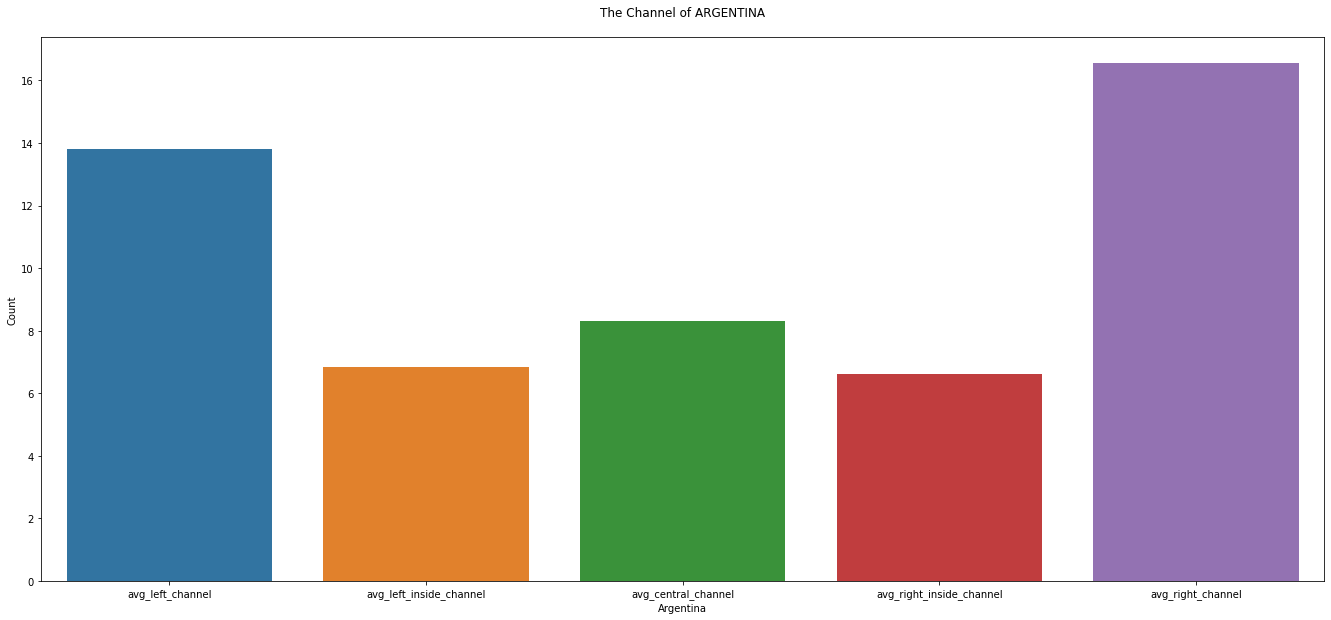

In [16]:
argentina_total = team_total.loc[team_total['team1']== 'ARGENTINA']
#argentina_total
# Set the figure size
plt.figure(figsize=(23, 10))

# Create the bar plot using Seaborn
sns.barplot(data=argentina_total[['avg_left_channel',
                                  'avg_left_inside_channel', 
                                  'avg_central_channel', 
                                  'avg_right_inside_channel', 
                                  'avg_right_channel']])

# Set the x-axis label
plt.xlabel("Argentina")

# Set the y-axis label
plt.ylabel("Count")

# Set the plot title
plt.title('The Channel of ARGENTINA\n')

# Display the plot
plt.show()

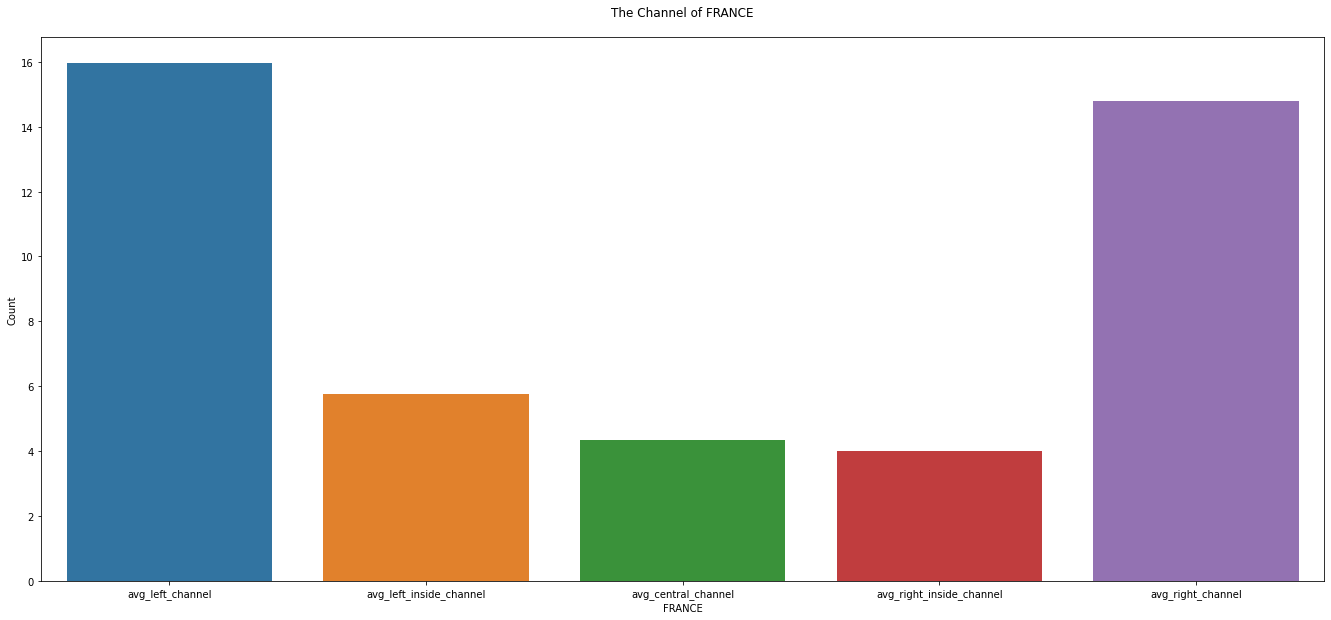

In [29]:
france_total = team_total.loc[team_total['team1']== 'FRANCE']
#argentina_total
# Set the figure size
plt.figure(figsize=(23, 10))

# Create the bar plot using Seaborn
sns.barplot(data=france_total[['avg_left_channel',
                                  'avg_left_inside_channel', 
                                  'avg_central_channel', 
                                  'avg_right_inside_channel', 
                                  'avg_right_channel']])

# Set the x-axis label
plt.xlabel("FRANCE")

# Set the y-axis label
plt.ylabel("Count")

# Set the plot title
plt.title('The Channel of FRANCE\n')

# Display the plot
plt.show()

So, why did the two teams choose different tactics? This is related to their deployment and personnel configuration. The Argentine players are generally small in stature but have good footwork. They choose to use the characteristics of tall and slow-turning defensive players to pass the ball through the gaps between them and find opportunities to attack. This type of pass is called "offer in behind to receive". In the third image below, when passing the ball, the receiving player runs forward through the gap between the defensive players, and the passing player passes the ball to a position behind the defensive player to break the defensive line by passing and finding attacking opportunities. Argentina ranked second in the total number of "offers in behind to receive" in this World Cup, and there was almost no gap with the team ranked first. As for France, because their two wing players have outstanding abilities and their number 9 player, the center forward, is tall, they mainly choose their wing players to break the defensive line and pass the ball to the center forward to seek opportunities. In this World Cup, France ranked second in the total number of crosses among all teams, which also validates their attacking choices

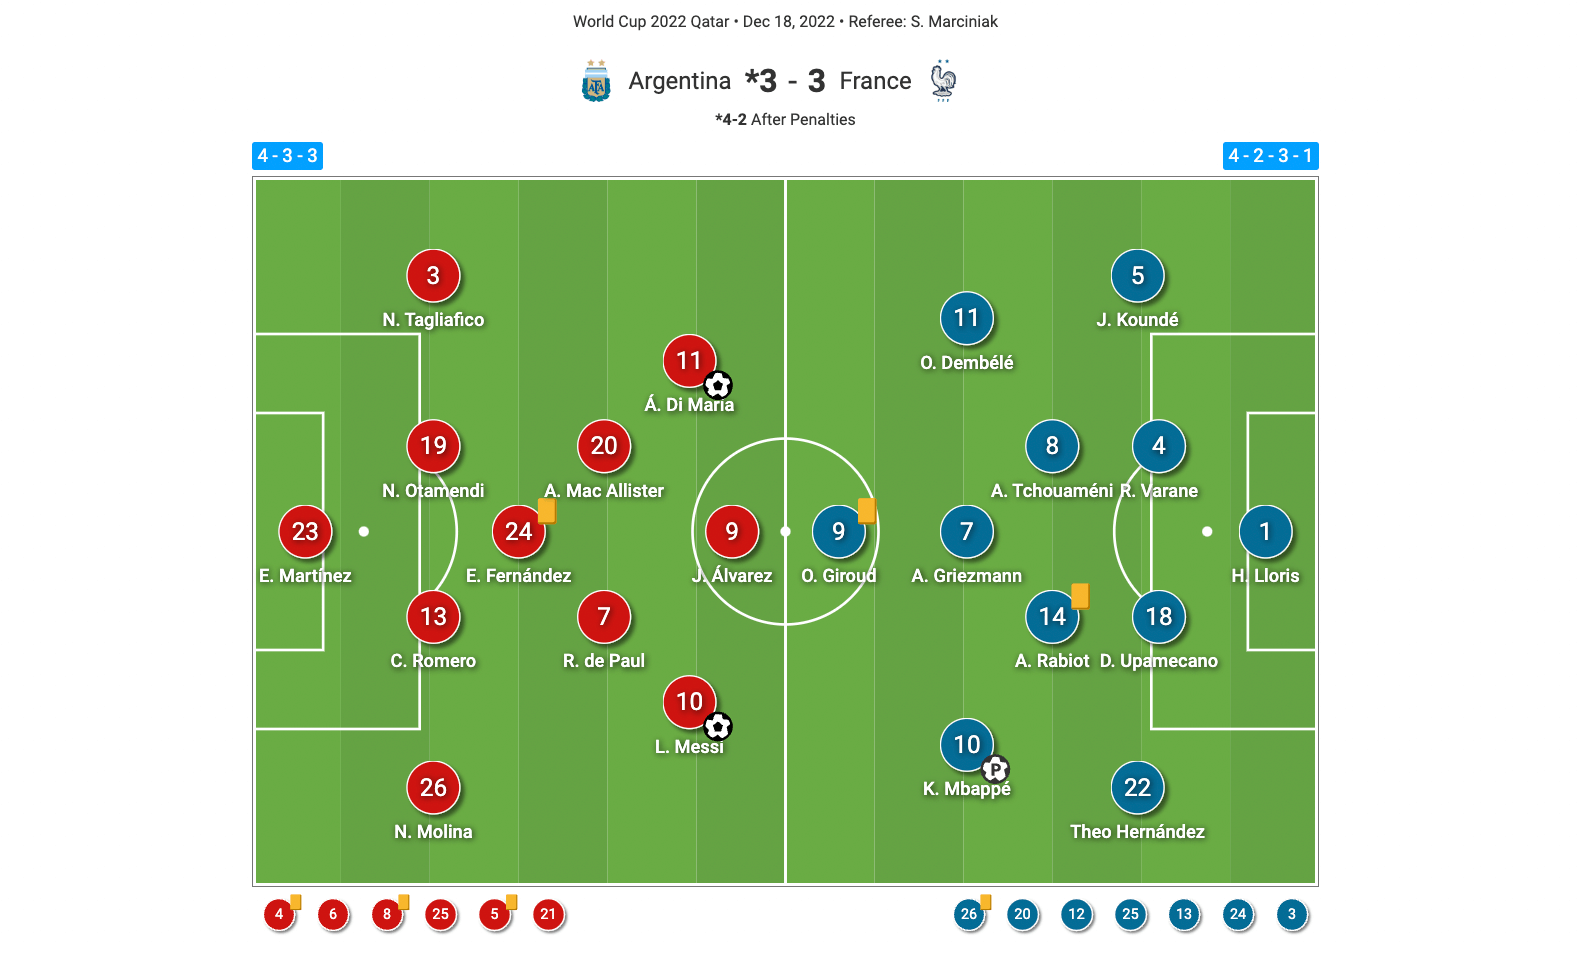

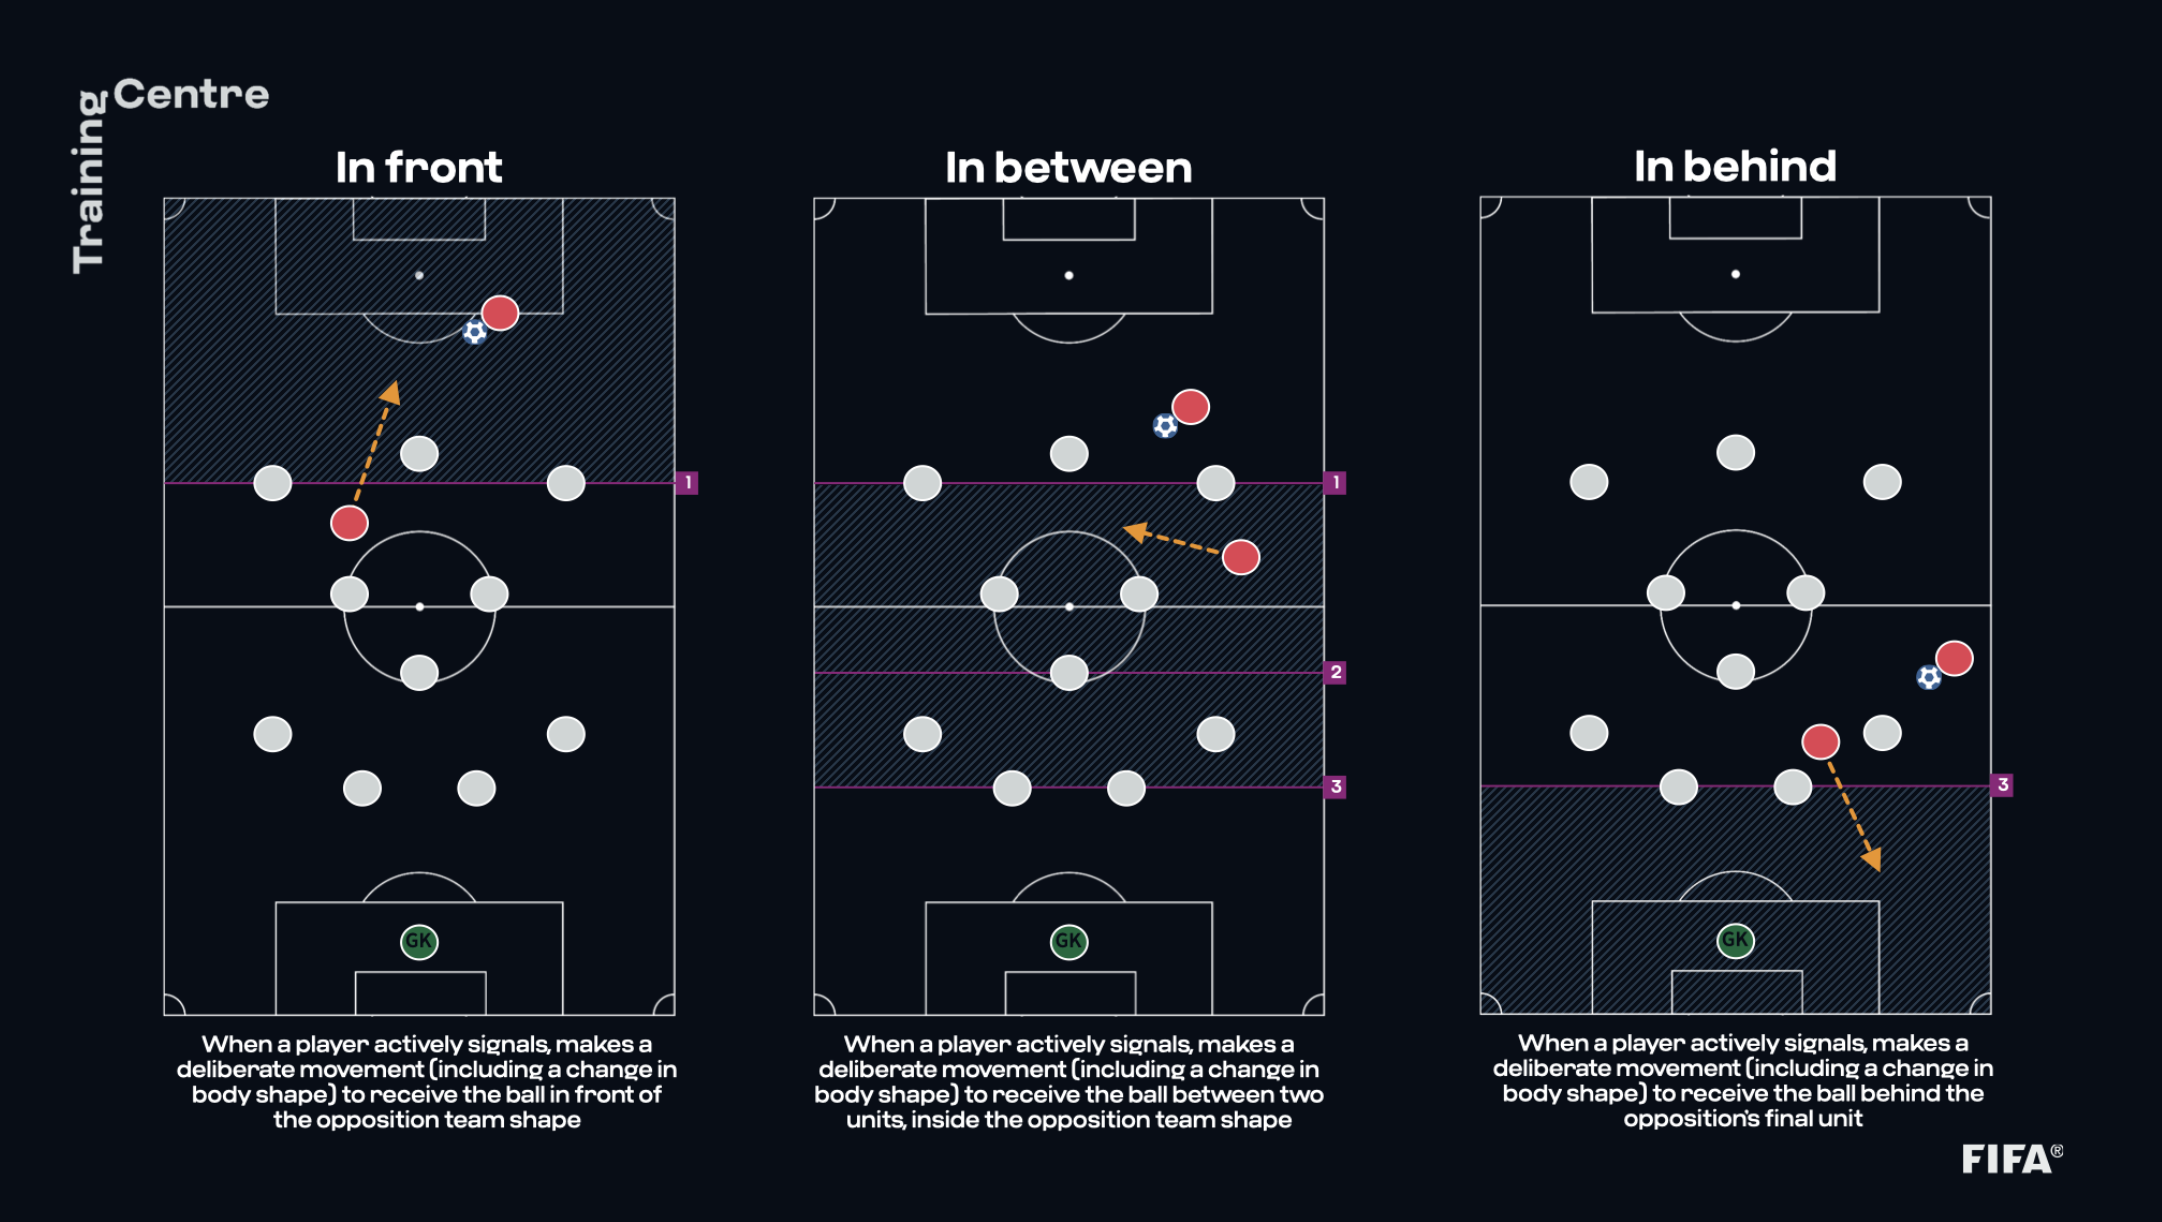

In [18]:
fig = px.bar(team_total, y='total_inbehind_offers_to_receive', x='team1', 
             text='total_inbehind_offers_to_receive')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(
    title="Total Inbehind Offers to Receive",
    xaxis_title="Teams",
    yaxis_title="Total Inbehind Offers to Receive"
)


# Rotate x-axis labels
fig.update_xaxes(tickangle=45)

if "ARGENTINA" in team_total['team1'].values:
    # Set color of bars
    colors = ['blue'] * len(team_total)
    argentina_idx = team_total.index[team_total['team1'] == 'ARGENTINA'][0]
    colors[argentina_idx] = 'red'
    fig.update_traces(marker_color=colors)

# Display the plot
fig.show()


In [19]:
fig = px.bar(team_total, y='total_crosses', x='team1', 
             text='total_crosses')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(
    title="Total Crosses",
    xaxis_title="Teams",
    yaxis_title="Total Crosses"
)


# Rotate x-axis labels
fig.update_xaxes(tickangle=45)

if "FRANCE" in team_total['team1'].values:
    # Set color of bars
    colors = ['blue'] * len(team_total)
    argentina_idx = team_total.index[team_total['team1'] == 'FRANCE'][0]
    colors[argentina_idx] = 'red'
    fig.update_traces(marker_color=colors)

# Display the plot
fig.show()

Let's go back to the data of the final match and compare the number of shots attempted by both teams inside and outside the penalty area. Argentina had a total of 21 attempts and France had 10 attempts. Combined with the two teams' possession rates, it shows that Argentina had stronger control over the game. Argentina attempted 10 shots inside the penalty area and 11 shots outside, indicating a more diverse range of shooting attempts. France attempted 7 shots inside the penalty area and only 3 shots outside, suggesting that they relied more on passing the ball into the penalty area before attempting a shot. Looking at the number of shots on target by both teams, Argentina had 9 shots on target with a 42% accuracy rate, resulting in 3 goals. France had 5 shots on target with a 50% accuracy rate, also made 3 goals. Based on these data, it can be concluded that Argentina had an advantage on the field, creating more opportunities to shoot, but lacked the ability to capitalize on them. In contrast, France had fewer opportunities but was able to seize them and score goals despite being in a weaker position during the game.

In [20]:
# Group the data by team1 and team2
grouped_data3 = final.groupby('team1').sum()[['attempts_inside_the_penalty_area_team1', 'attempts_outside_the_penalty_area__team1']]
grouped_data4 = final.groupby('team2').sum()[['attempts_inside_the_penalty_area__team2', 'attempts_outside_the_penalty_area__team2']]

grouped_data3 = grouped_data3.rename(columns={
    'attempts_inside_the_penalty_area_team1': 'inside_the_penalty_area',
    'attempts_outside_the_penalty_area__team1': 'outside_the_penalty_area'
})

grouped_data4 = grouped_data4.rename(columns={
    'attempts_inside_the_penalty_area__team2': 'inside_the_penalty_area', 
    'attempts_outside_the_penalty_area__team2': 'outside_the_penalty_area'
})
# Merge the two grouped dataframes
grouped_data5 = pd.concat([grouped_data3, grouped_data4])

fig = px.bar(grouped_data5, x=grouped_data5.index, y=['inside_the_penalty_area', 'outside_the_penalty_area'],
             barmode='stack')
fig.update_layout(title='Attempts inside/outside the penalty area', 
                  xaxis_title='Teams', 
                  yaxis_title='Number of attempts')

# Create the bar plot using Plotly
fig4 = go.Figure(
    data=[go.Bar(x=['Argentina'], y=final['on_target_attempts_team1'], name='Argentina_on_target_attempts'),
          go.Bar(x=['France'], y=final['on_target_attempts_team2'], name='France_on_target_attempts')],
)

# Set the y-axis label
fig4.update_yaxes(title='Count', tickvals=[0, 5, 10, 15, 20])

# Set the plot title
fig4.update_layout(title='Attempt on Target\n')


# Display the plot
fig.show()
fig4.show()


Let's take a look at the passing data for both teams. Argentina had more passes in all three categories, indicating that they had better control over the direction and flow of the ball compared to France. By calculating the percentage of passes, the "offer in behind to receive", which is more likely to create opportunities, Argentina had a higher percentage than France, suggesting that Argentina was more aggressive in their attacking play. This higher level of attacking aggressiveness also ensured that Argentina had more opportunities to score.

In [22]:
# Group the data by team1 and team2
grouped_data1 = final.groupby('team1').sum()[['inbehind_offers_to_receive_team1', 'inbetween_offers_to_receive_team1', 'infront_offers_to_receive_team1']]
grouped_data2 = final.groupby('team2').sum()[['inbehind_offers_to_receive_team2', 'inbetween_offers_to_receive_team2', 'infront_offers_to_receive_team2']]

grouped_data1 = grouped_data1.rename(columns={
    'inbehind_offers_to_receive_team1': 'inbehind_offers_to_receive',
    'inbetween_offers_to_receive_team1': 'inbetween_offers_to_receive',
    'infront_offers_to_receive_team1': 'infront_offers_to_receive'
})

grouped_data2 = grouped_data2.rename(columns={
    'inbehind_offers_to_receive_team2': 'inbehind_offers_to_receive',
    'inbetween_offers_to_receive_team2': 'inbetween_offers_to_receive',
    'infront_offers_to_receive_team2': 'infront_offers_to_receive'
})
# Merge the two grouped dataframes
grouped_data = pd.concat([grouped_data1, grouped_data2])

fig = px.bar(grouped_data, x=grouped_data.index, y=['infront_offers_to_receive','inbetween_offers_to_receive','inbehind_offers_to_receive'],
             barmode='stack')
fig.update_layout(title='Offers to Receive', 
                  xaxis_title='Teams', 
                  yaxis_title='Number of Offers')

# Percentage
random_x = [146, 257, 204]
names = ['Inbehind_Argentina', 'Infront_argentina','Inbetween_Argentina'] 
fig4 = px.pie(values=random_x, names=names)
fig4.update_traces(pull = [0.15,0,0])
fig4.update_layout(title='Offers to receive % of Argentina')

random_x = [105, 207, 195]
names = ['Inbehind_France','Infront_France','Inbetween_France']
fig5 = px.pie(values=random_x, names=names)
fig5.update_traces(pull = [0.15,0,0])
fig5.update_layout(title='Offers to receive % of France')

fig.show()
fig4.show()
fig5.show()

Let's take a look at the defensive lines of both teams. By comparing the attempts and completions of defensive line breaks, the success rate is almost the same, with only a 5% difference. However, Argentina had much more attempts on the defensive line breaks, indicating that Argentina had a greater impact on France's defensive line. In terms of crossing data, France has more crossing attempts because it is their common attacking method. Facing the advantage of height against the Argentina, this data should have given France more attacking advantages. However, compared with the crossing success rate of the two teams, France did not perform well in crossing in this match. In other words, Argentina had a better defensive performance in this match.

In [24]:
# Group the data by team1 and team2
grouped_data6 = final.groupby('team1').sum()[['attempted_defensive_line_breaks_team1', 'completed_defensive_line_breaksteam1', 'crosses_team1', 'crosses_completed_team1']]
grouped_data7 = final.groupby('team2').sum()[['attempted_defensive_line_breaks_team2', 'completed_defensive_line_breaks_team2','crosses_team2','crosses_completed_team1']]

grouped_data6 = grouped_data6.rename(columns={
    'attempted_defensive_line_breaks_team1': 'attempted_defensive_line_breaks', 
    'completed_defensive_line_breaksteam1': 'completed_defensive_line_breaks', 
    'crosses_team1': 'crosses_attempted', 
    'crosses_completed_team1' : 'crosses_completed'
})

grouped_data7 = grouped_data7.rename(columns={
    'attempted_defensive_line_breaks_team2': 'attempted_defensive_line_breaks', 
    'completed_defensive_line_breaks_team2': 'completed_defensive_line_breaks', 
    'crosses_team2': 'crosses_attempted', 
    'crosses_completed_team1' : 'crosses_completed'
})
# Merge the two grouped dataframes
grouped_data8 = pd.concat([grouped_data6, grouped_data7])

fig = px.bar(grouped_data8, x=grouped_data8.index, y=['attempted_defensive_line_breaks', 'completed_defensive_line_breaks','crosses_attempted','crosses_completed'],
             barmode='group')
fig.update_layout(title='Defensive Line Breaks / Crosses Attempts', 
                  xaxis_title='Teams', yaxis_title='Count')
fig.show()

Finally, let's take a look at the defensive pressure on the ball-carrying players. We can see that France had a much higher defensive pressure applied on the ball-carrying players than Argentina did. But, France had more forced turnovers than Argentina, which could be due to various factors such as technical ability, defensive tactics, defensive skills, and mental problems. Overall, in terms of this indicator, Argentina performed better than the France in this match.

In [26]:
# Group the data by team1 and team2
grouped_data9 = final.groupby('team1').sum()[['defensive_pressures_applied_team1', 'forced_turnovers_team1']]
grouped_data10 = final.groupby('team2').sum()[['defensive_pressures_applied_team2', 'forced_turnovers_team2']]

grouped_data9 = grouped_data9.rename(columns={
    'defensive_pressures_applied_team1': 'defensive_pressures', 
    'forced_turnovers_team1': 'forced_turnovers'
})

grouped_data10 = grouped_data10.rename(columns={
    'defensive_pressures_applied_team2': 'defensive_pressures', 
    'forced_turnovers_team2': 'forced_turnovers'
})
# Merge the two grouped dataframes
grouped_data11 = pd.concat([grouped_data9, grouped_data10])

fig = px.bar(grouped_data11, x=grouped_data11.index, y=['defensive_pressures', 'forced_turnovers'],
             barmode='group')
fig.update_layout(title='Defensive Pressures And Forced Turnovers', 
                  xaxis_title='Teams', yaxis_title='Count')
fig.show()

Finally, based on all of our data visualization, we can draw the following conclusion: Argentina made targeted arrangements against France in the final, while France continued to play to their strengths. Argentina had more control of the game and created more opportunities, but the ability to capitalize on those opportunities was lower than France's. On the other hand, France relied on their superior ability to capitalize on opportunities to score when they were at a disadvantage. No matter how you look at it, this was an exciting final. Once again, congratulations to Argentina for winning the World Cup championship.

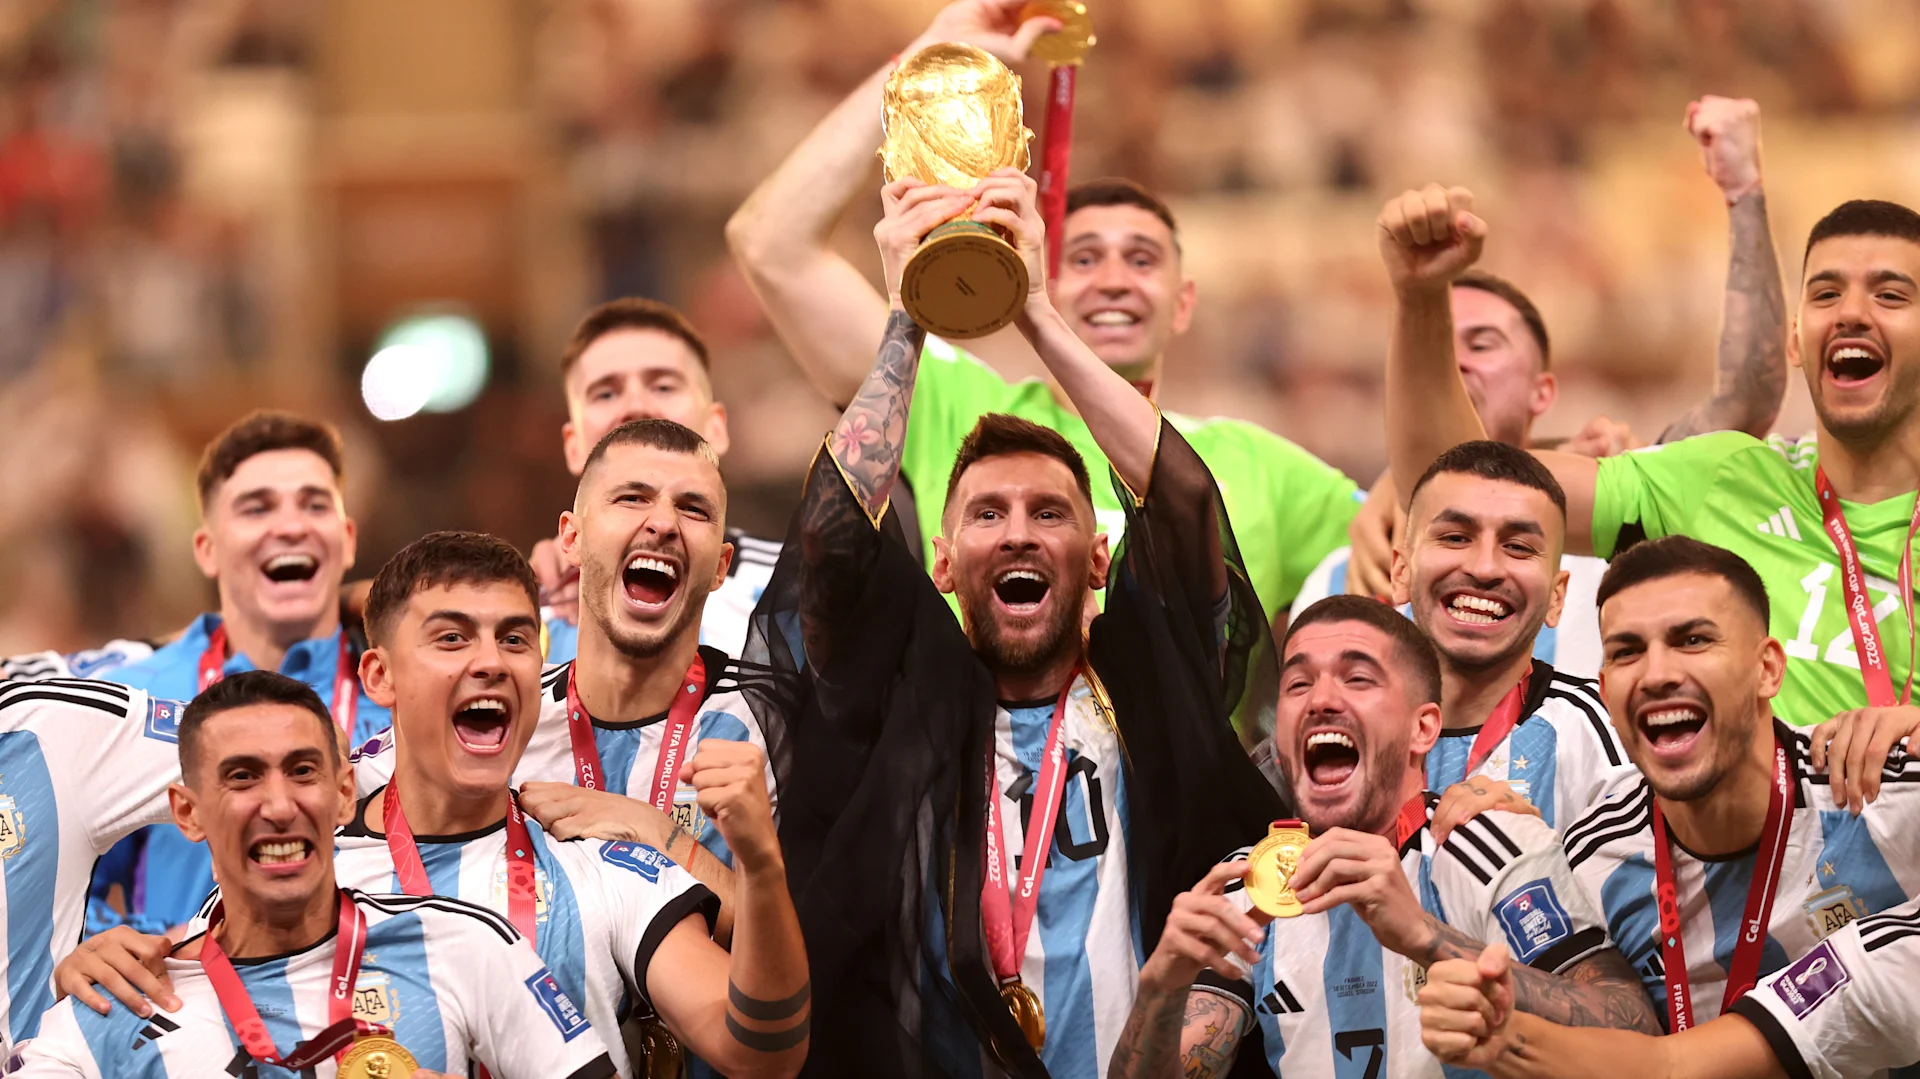